In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [70]:
pg = pd.read_csv("penguins.csv")
pg.describe

<bound method NDFrame.describe of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    MALE  

# Data Preprocessing

In [71]:
pg = pg.dropna()

In [72]:
pg.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Data statistics

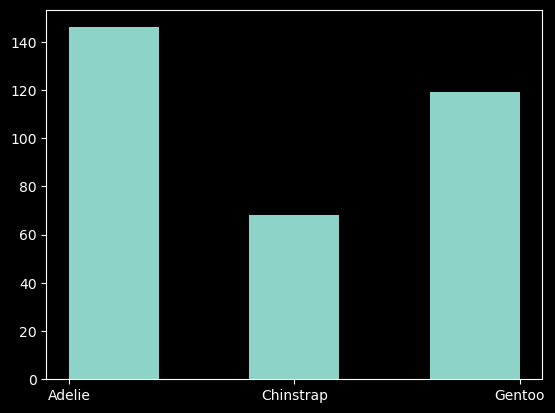

In [73]:
data = pg["species"]
plt.hist(data, bins=5)
plt.show()

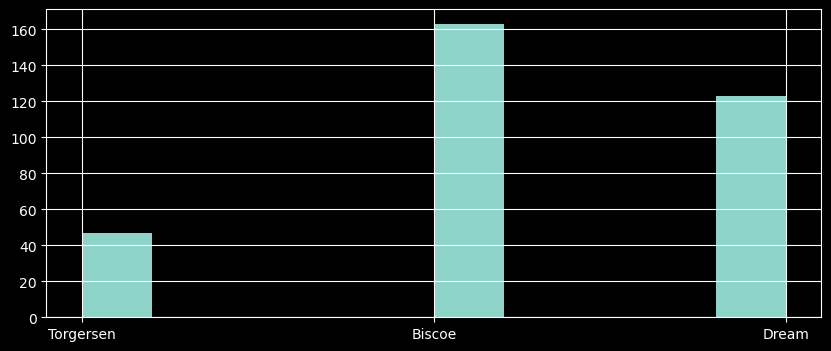

In [74]:
pg["island"].hist(figsize=(10,4));

In [75]:
pg["island"].describe()

count        333
unique         3
top       Biscoe
freq         163
Name: island, dtype: object

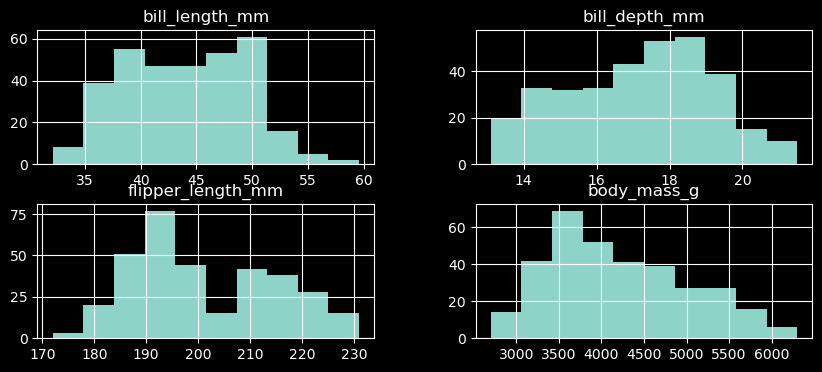

In [76]:
features = ["island","bill_length_mm","bill_depth_mm","flipper_length_mm","body_mass_g","sex"]

pg[features[1:5]].hist(figsize=(10,4));

In [77]:
pg[features].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


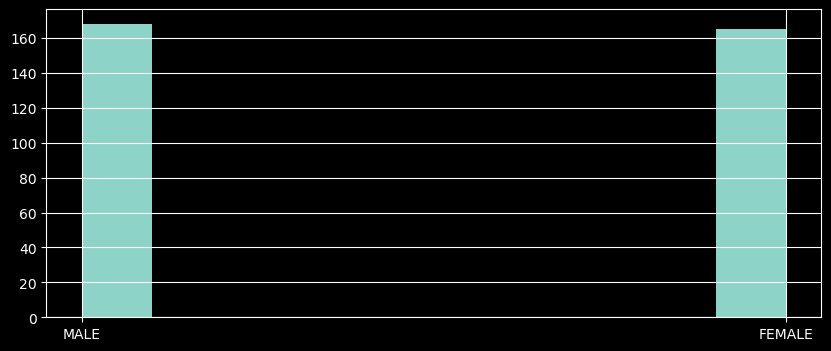

In [78]:
pg["sex"].hist(figsize=(10,4));

In [79]:
pg["sex"].describe()

count      333
unique       2
top       MALE
freq       168
Name: sex, dtype: object

# Decision Tree

In [80]:
X = pg[features]
y = pg["species"]
y[y == "Adelie"] = 1
y[y == "Chinstrap"] = 2
y[y == "Gentoo"] = 3
X.sex[X["sex"] == "MALE"] = 1
X.sex[X["sex"] == "FEMALE"] = 2
X.island[X["island"] == "Biscoe"] = 1
X.island[X["island"] == "Dream"] = 2
X.island[X["island"] == "Torgersen"] = 3
for feature in features: 
    X[feature] = X[feature].astype(int)
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_11516\178695735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == "Adelie"] = 1
C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_11516\178695735.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == "Adelie"] = 1
C:\Users\Douglas Chen\AppData\Local\Temp\ipykernel_11516\178695735.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == "Chinstrap"] = 2
C:\Users\Douglas

when maxdepth = 5, least node size = 2,
 the train accuracy is 0.99 and the test accuracy score is 0.96
when maxdepth = 5, least node size = 4,
 the train accuracy is 0.98 and the test accuracy score is 0.94
when maxdepth = 5, least node size = 6,
 the train accuracy is 0.97 and the test accuracy score is 0.94
when maxdepth = 7, least node size = 2,
 the train accuracy is 0.99 and the test accuracy score is 0.98
when maxdepth = 7, least node size = 4,
 the train accuracy is 0.98 and the test accuracy score is 0.94
when maxdepth = 7, least node size = 6,
 the train accuracy is 0.97 and the test accuracy score is 0.94
when maxdepth = 10, least node size = 2,
 the train accuracy is 0.99 and the test accuracy score is 0.96
when maxdepth = 10, least node size = 4,
 the train accuracy is 0.98 and the test accuracy score is 0.94
when maxdepth = 10, least node size = 6,
 the train accuracy is 0.97 and the test accuracy score is 0.94


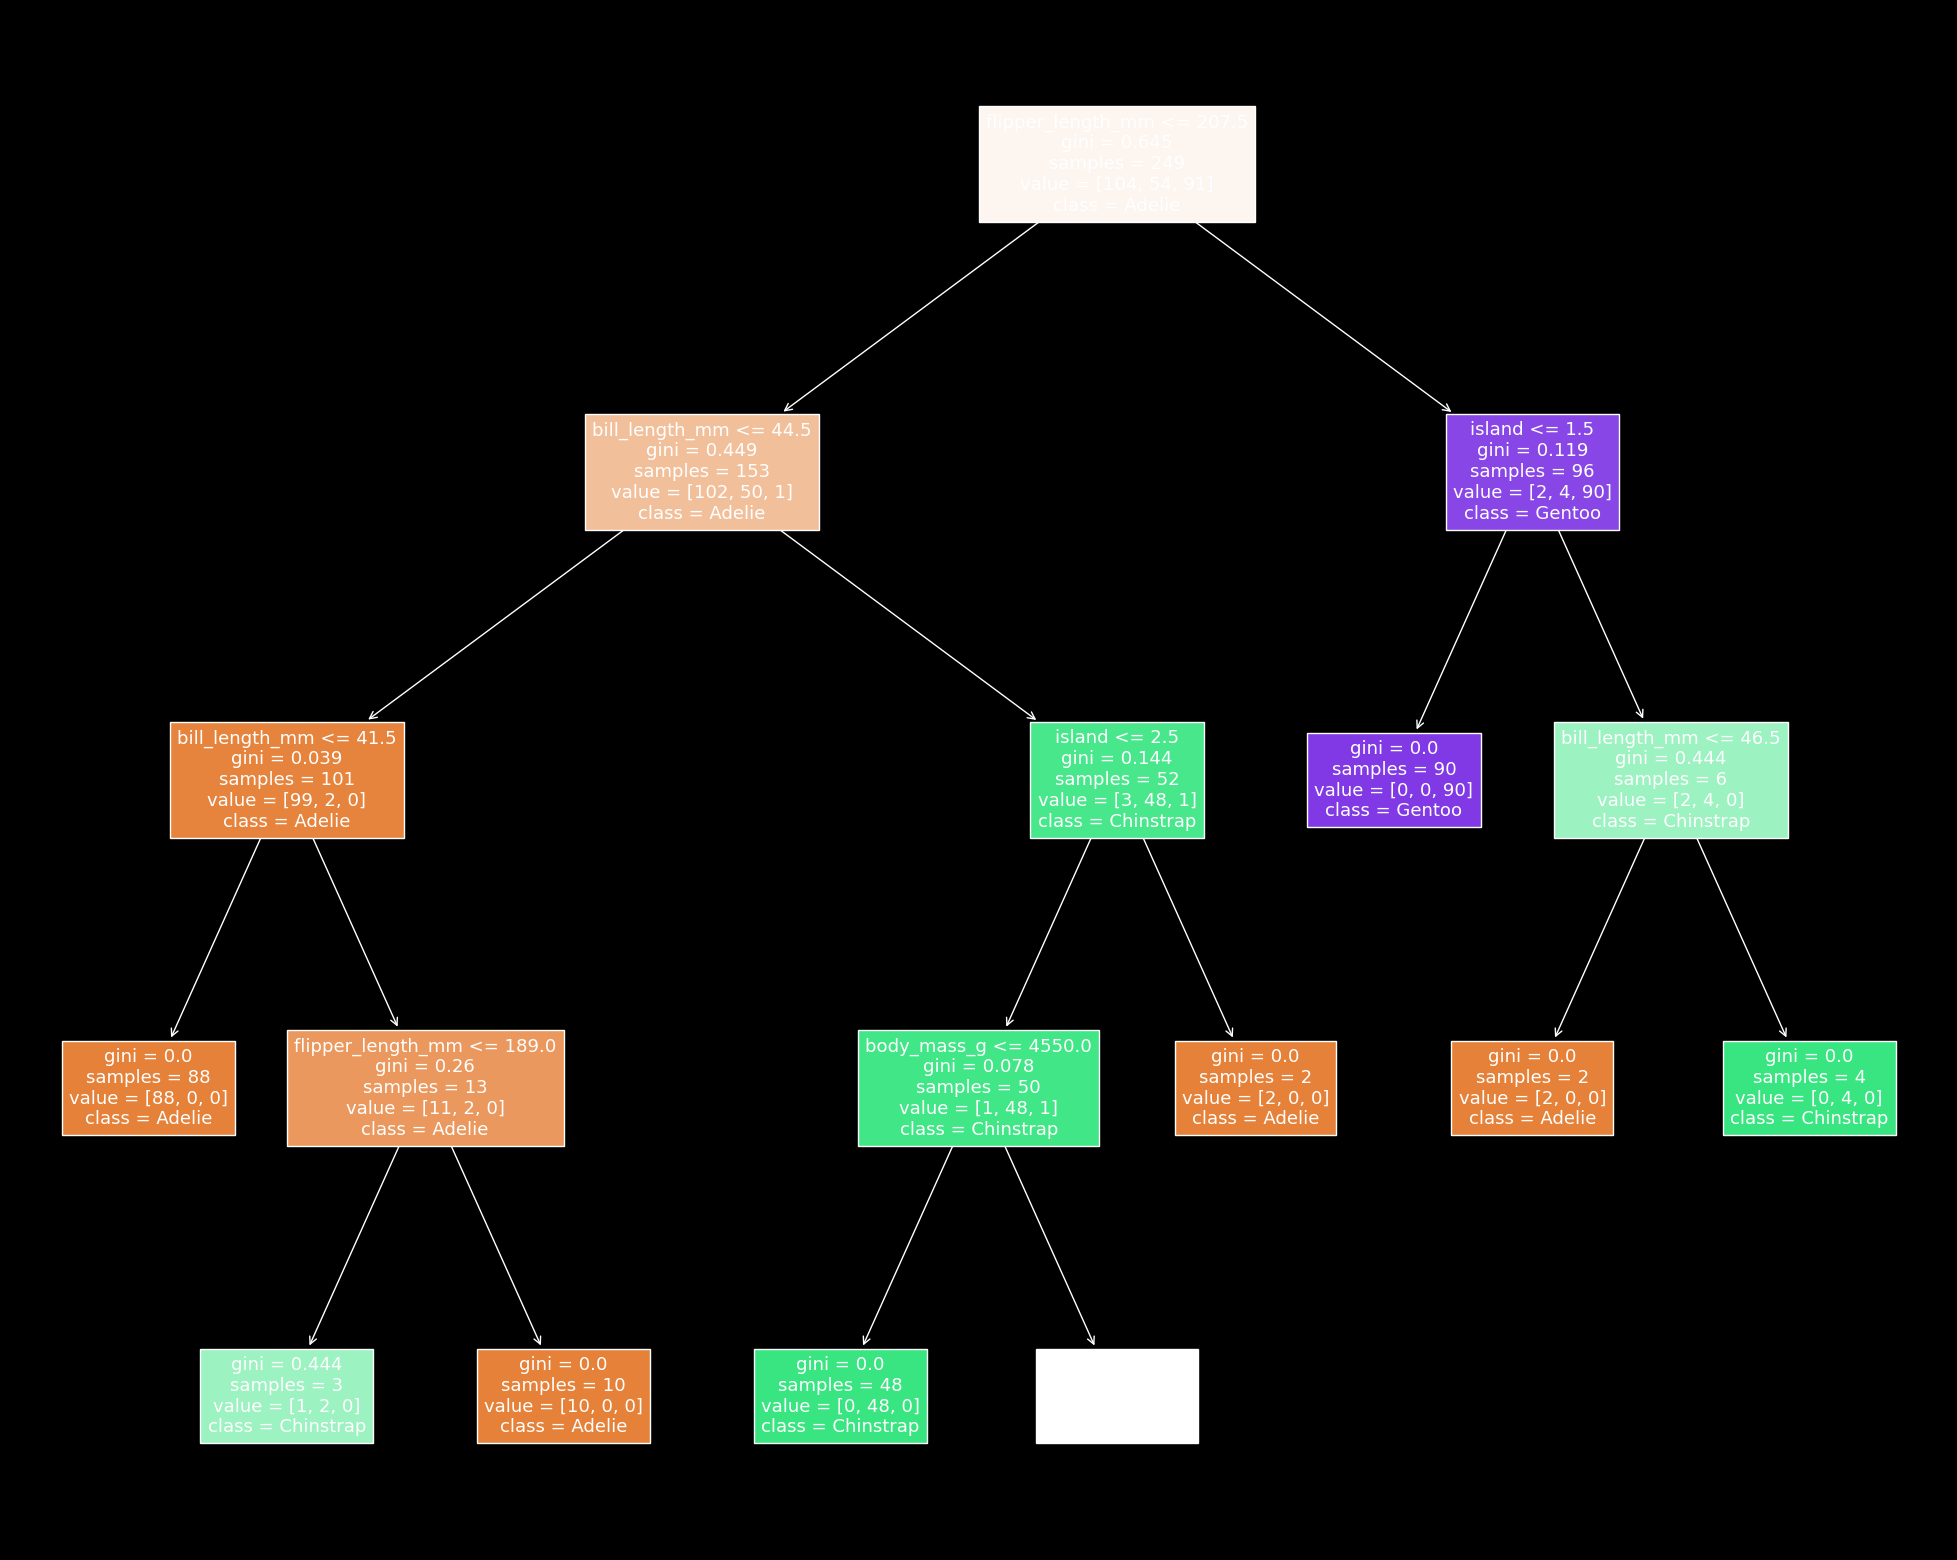

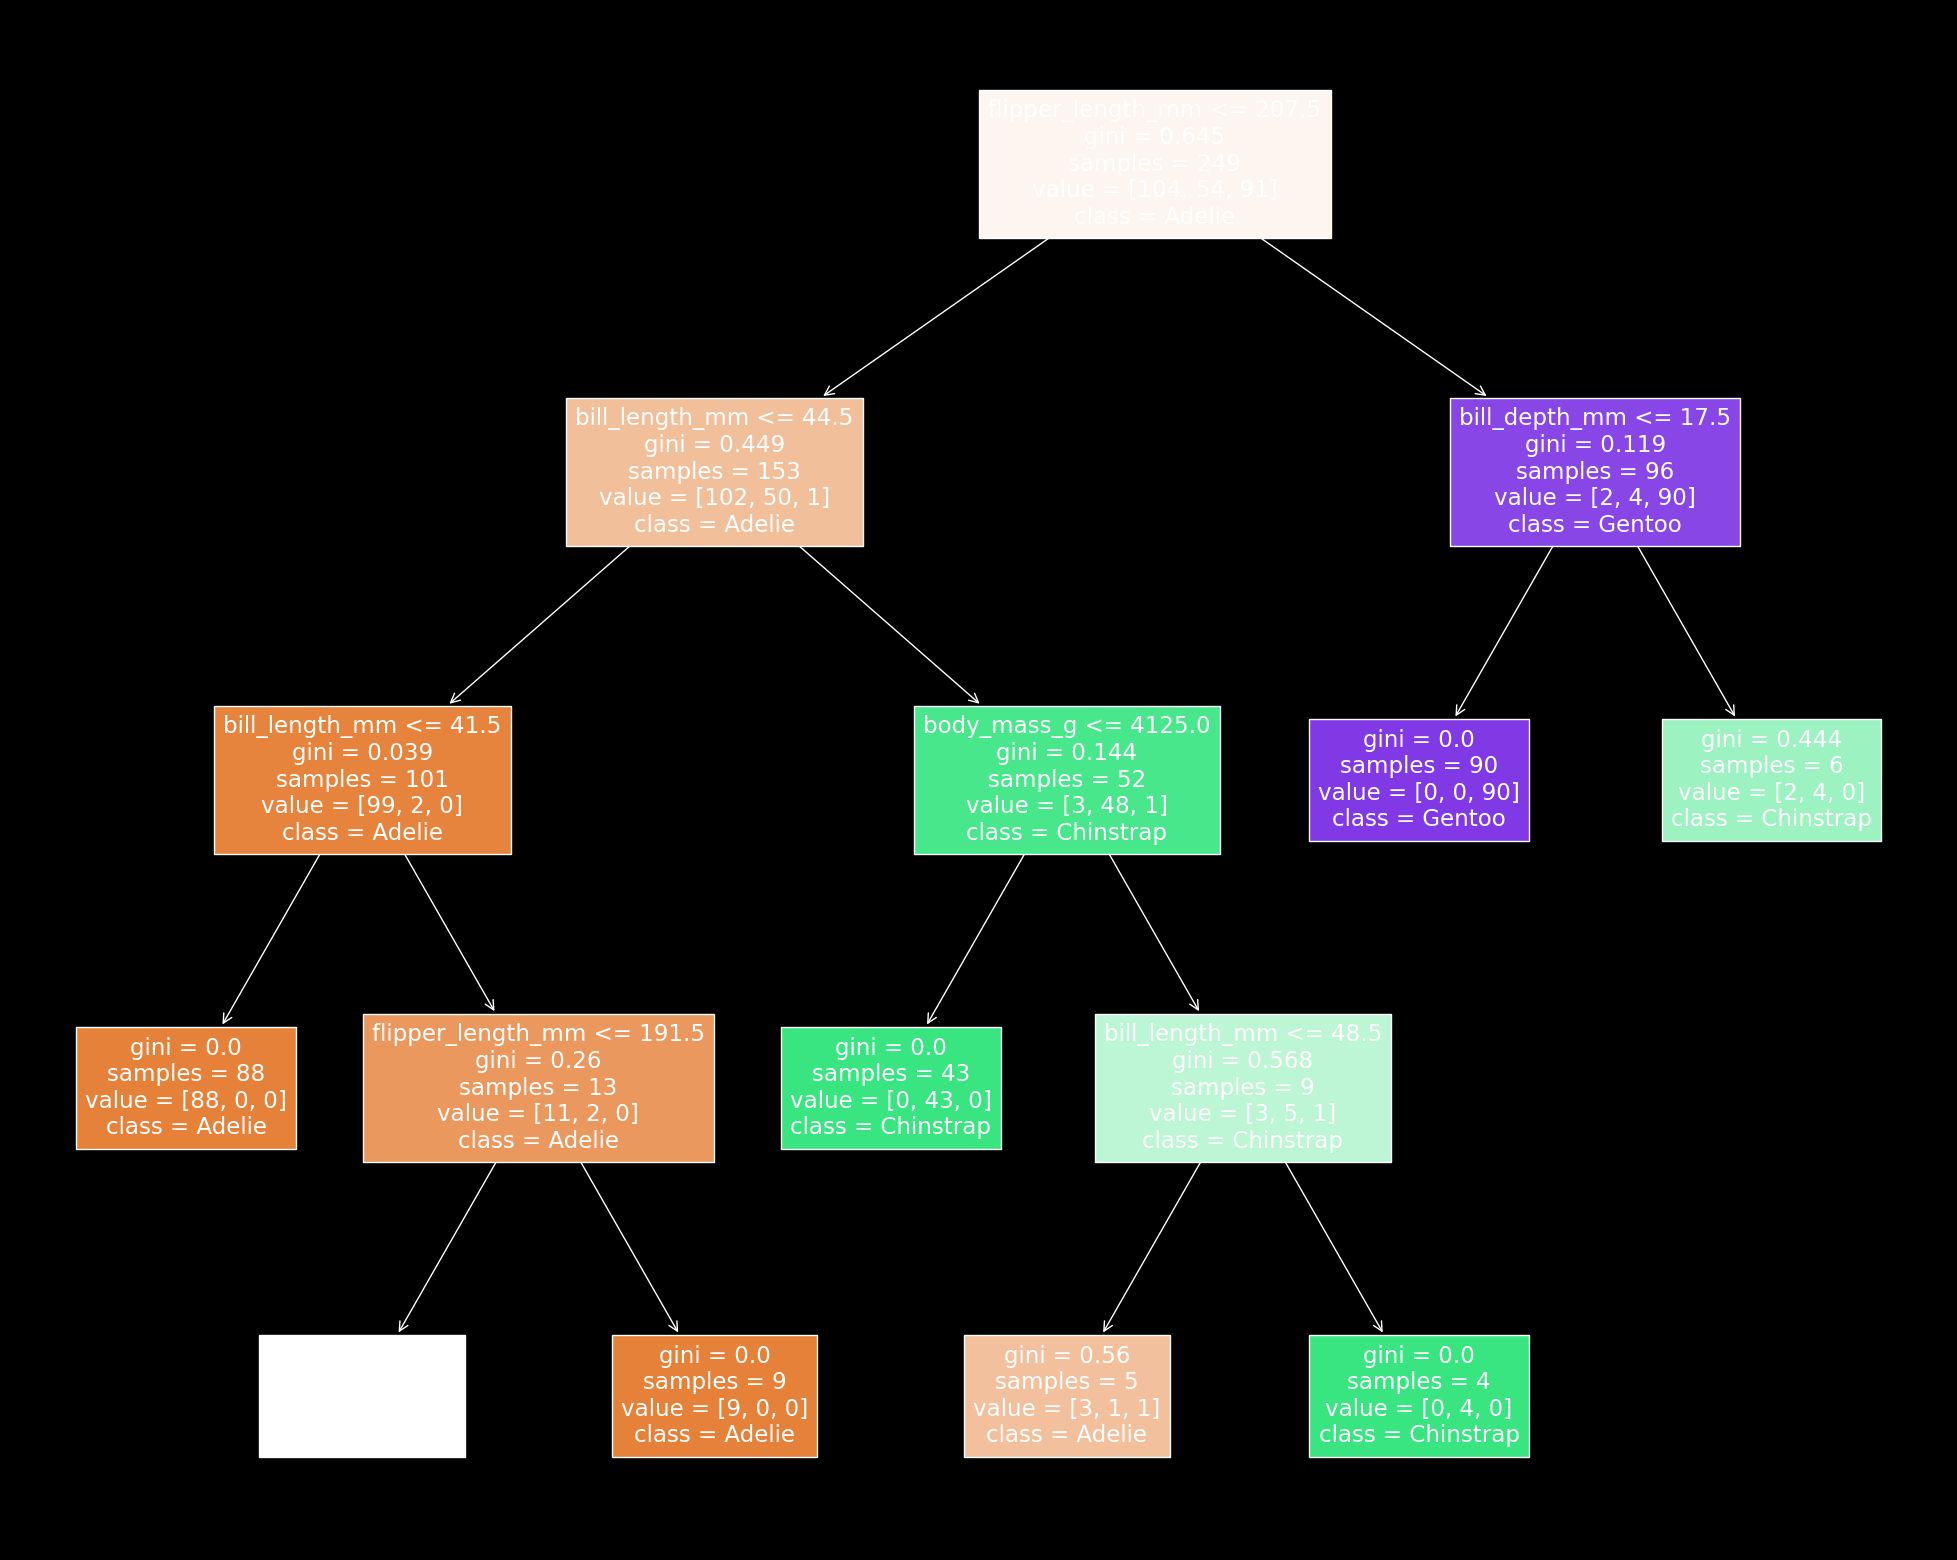

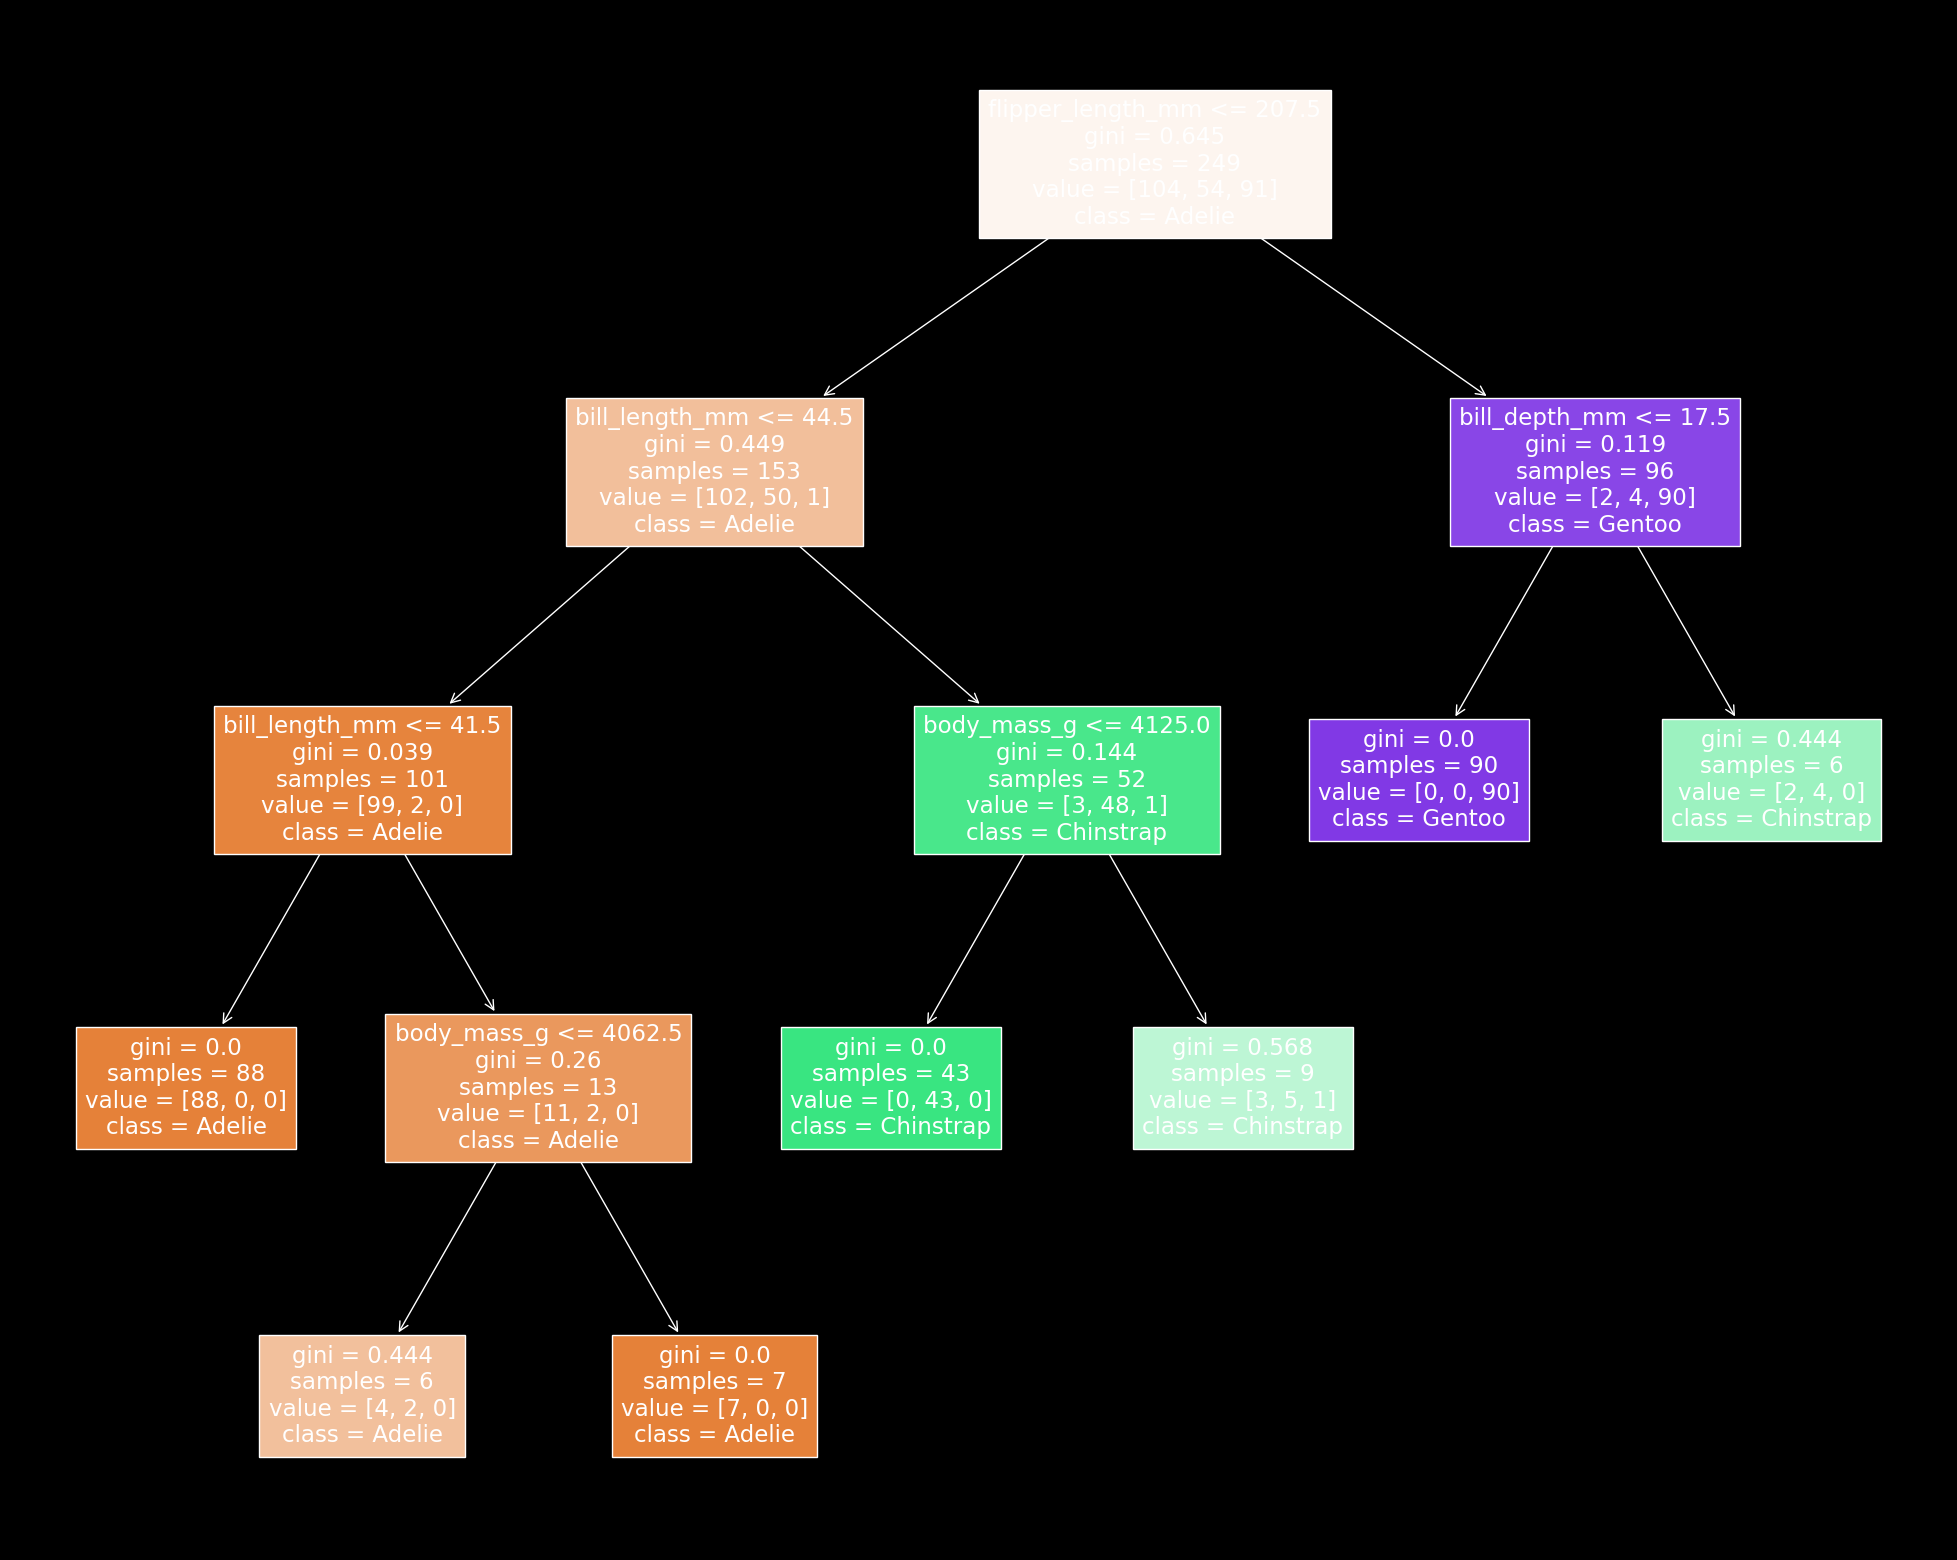

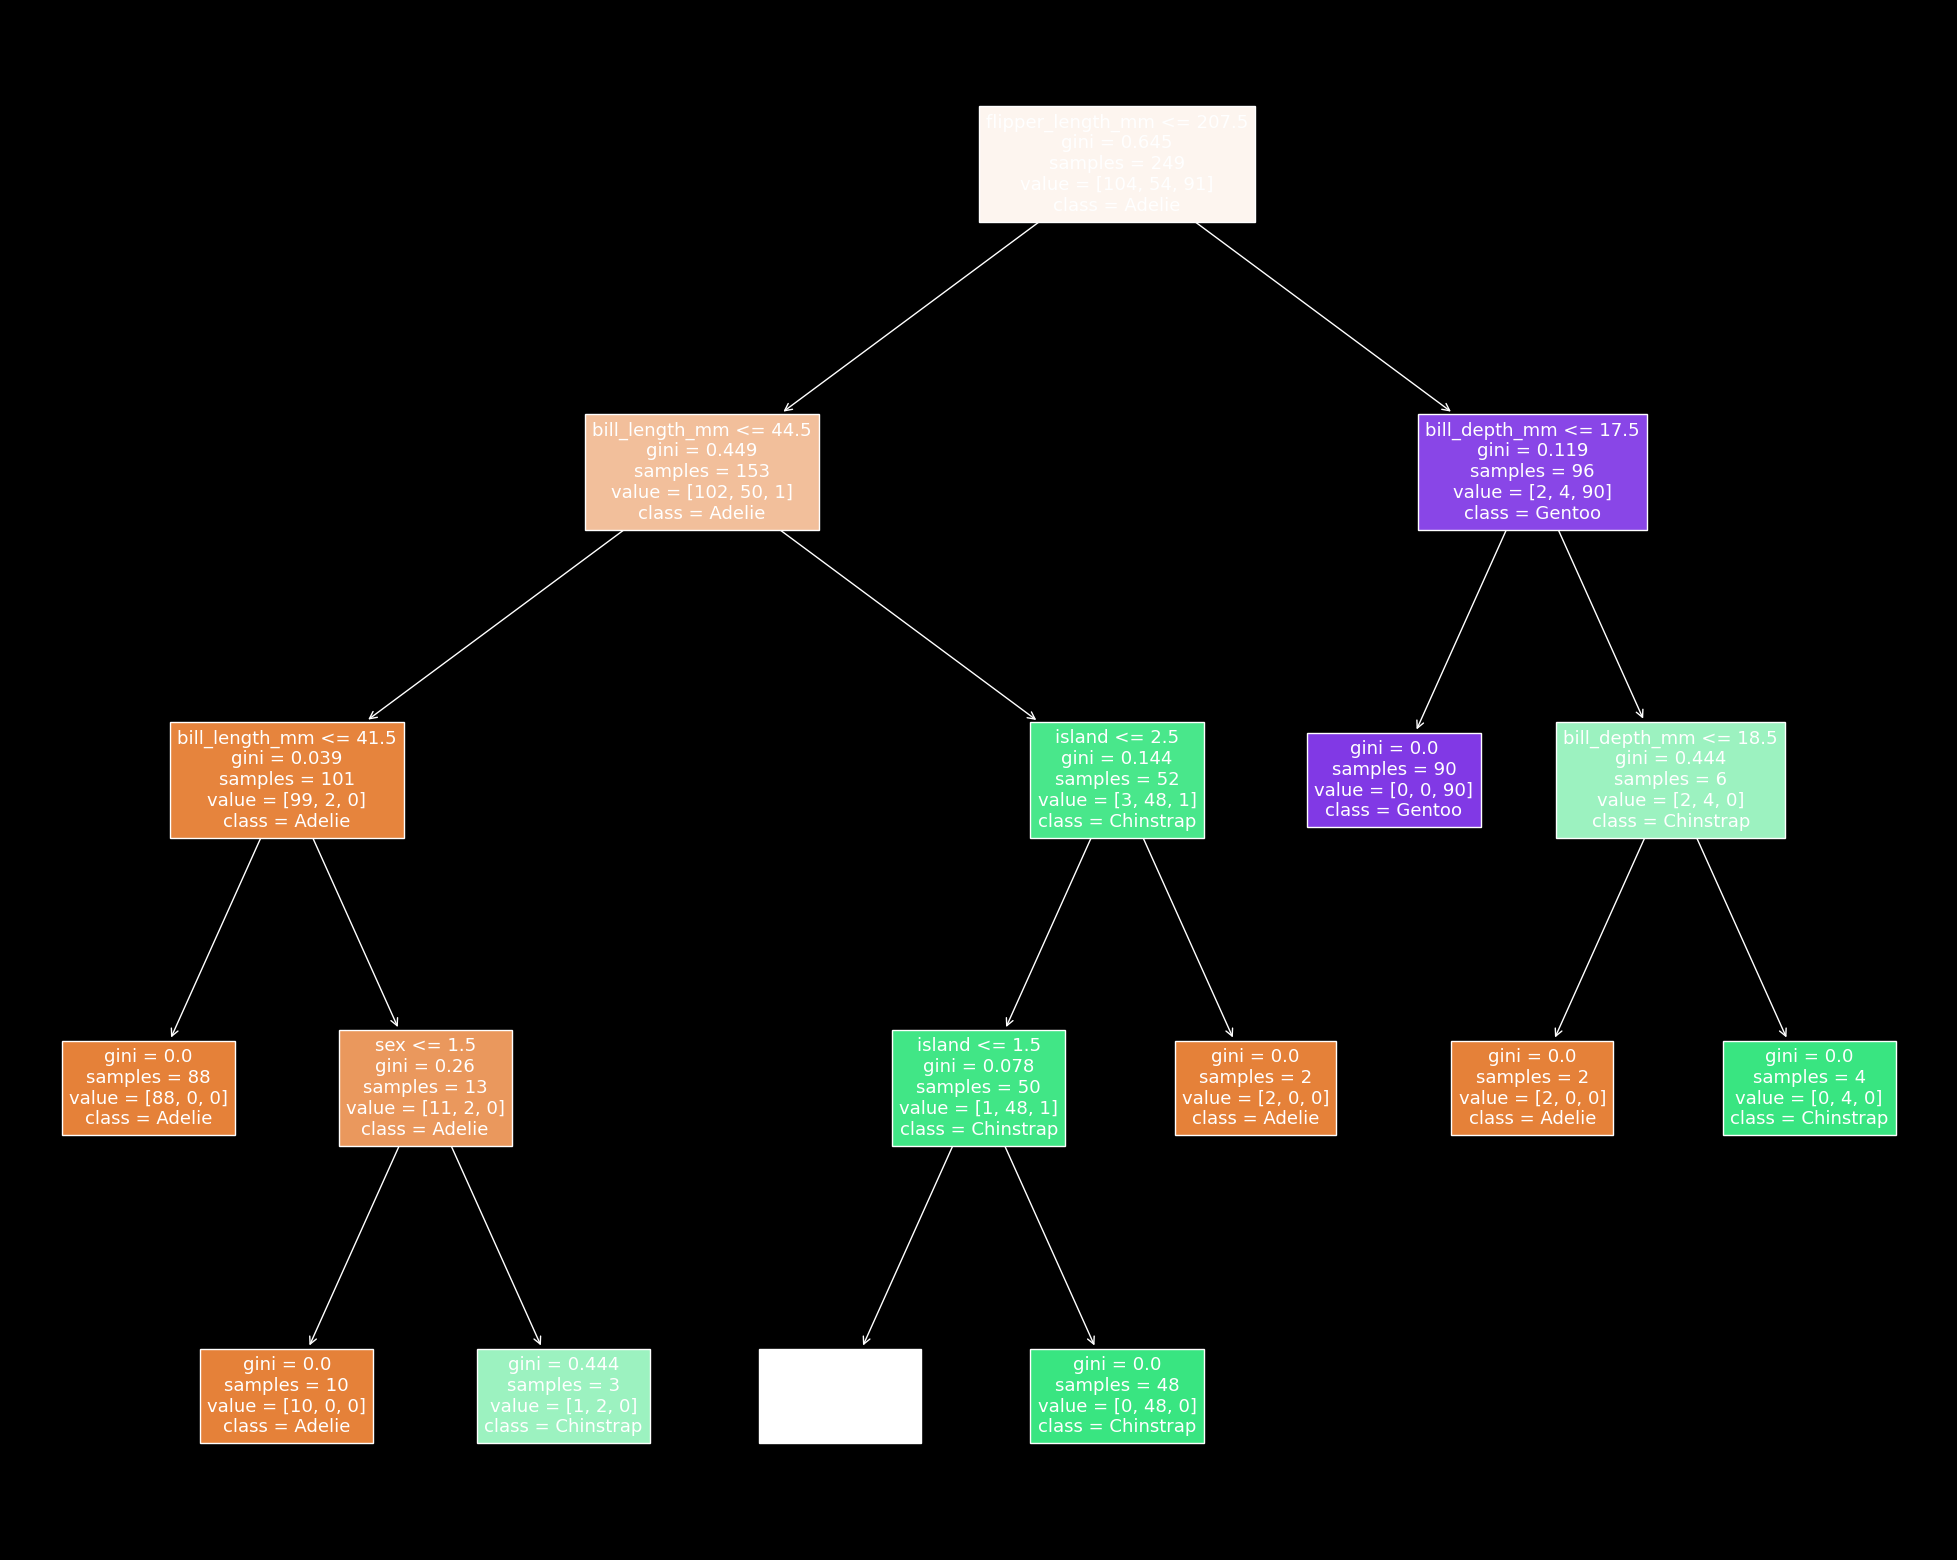

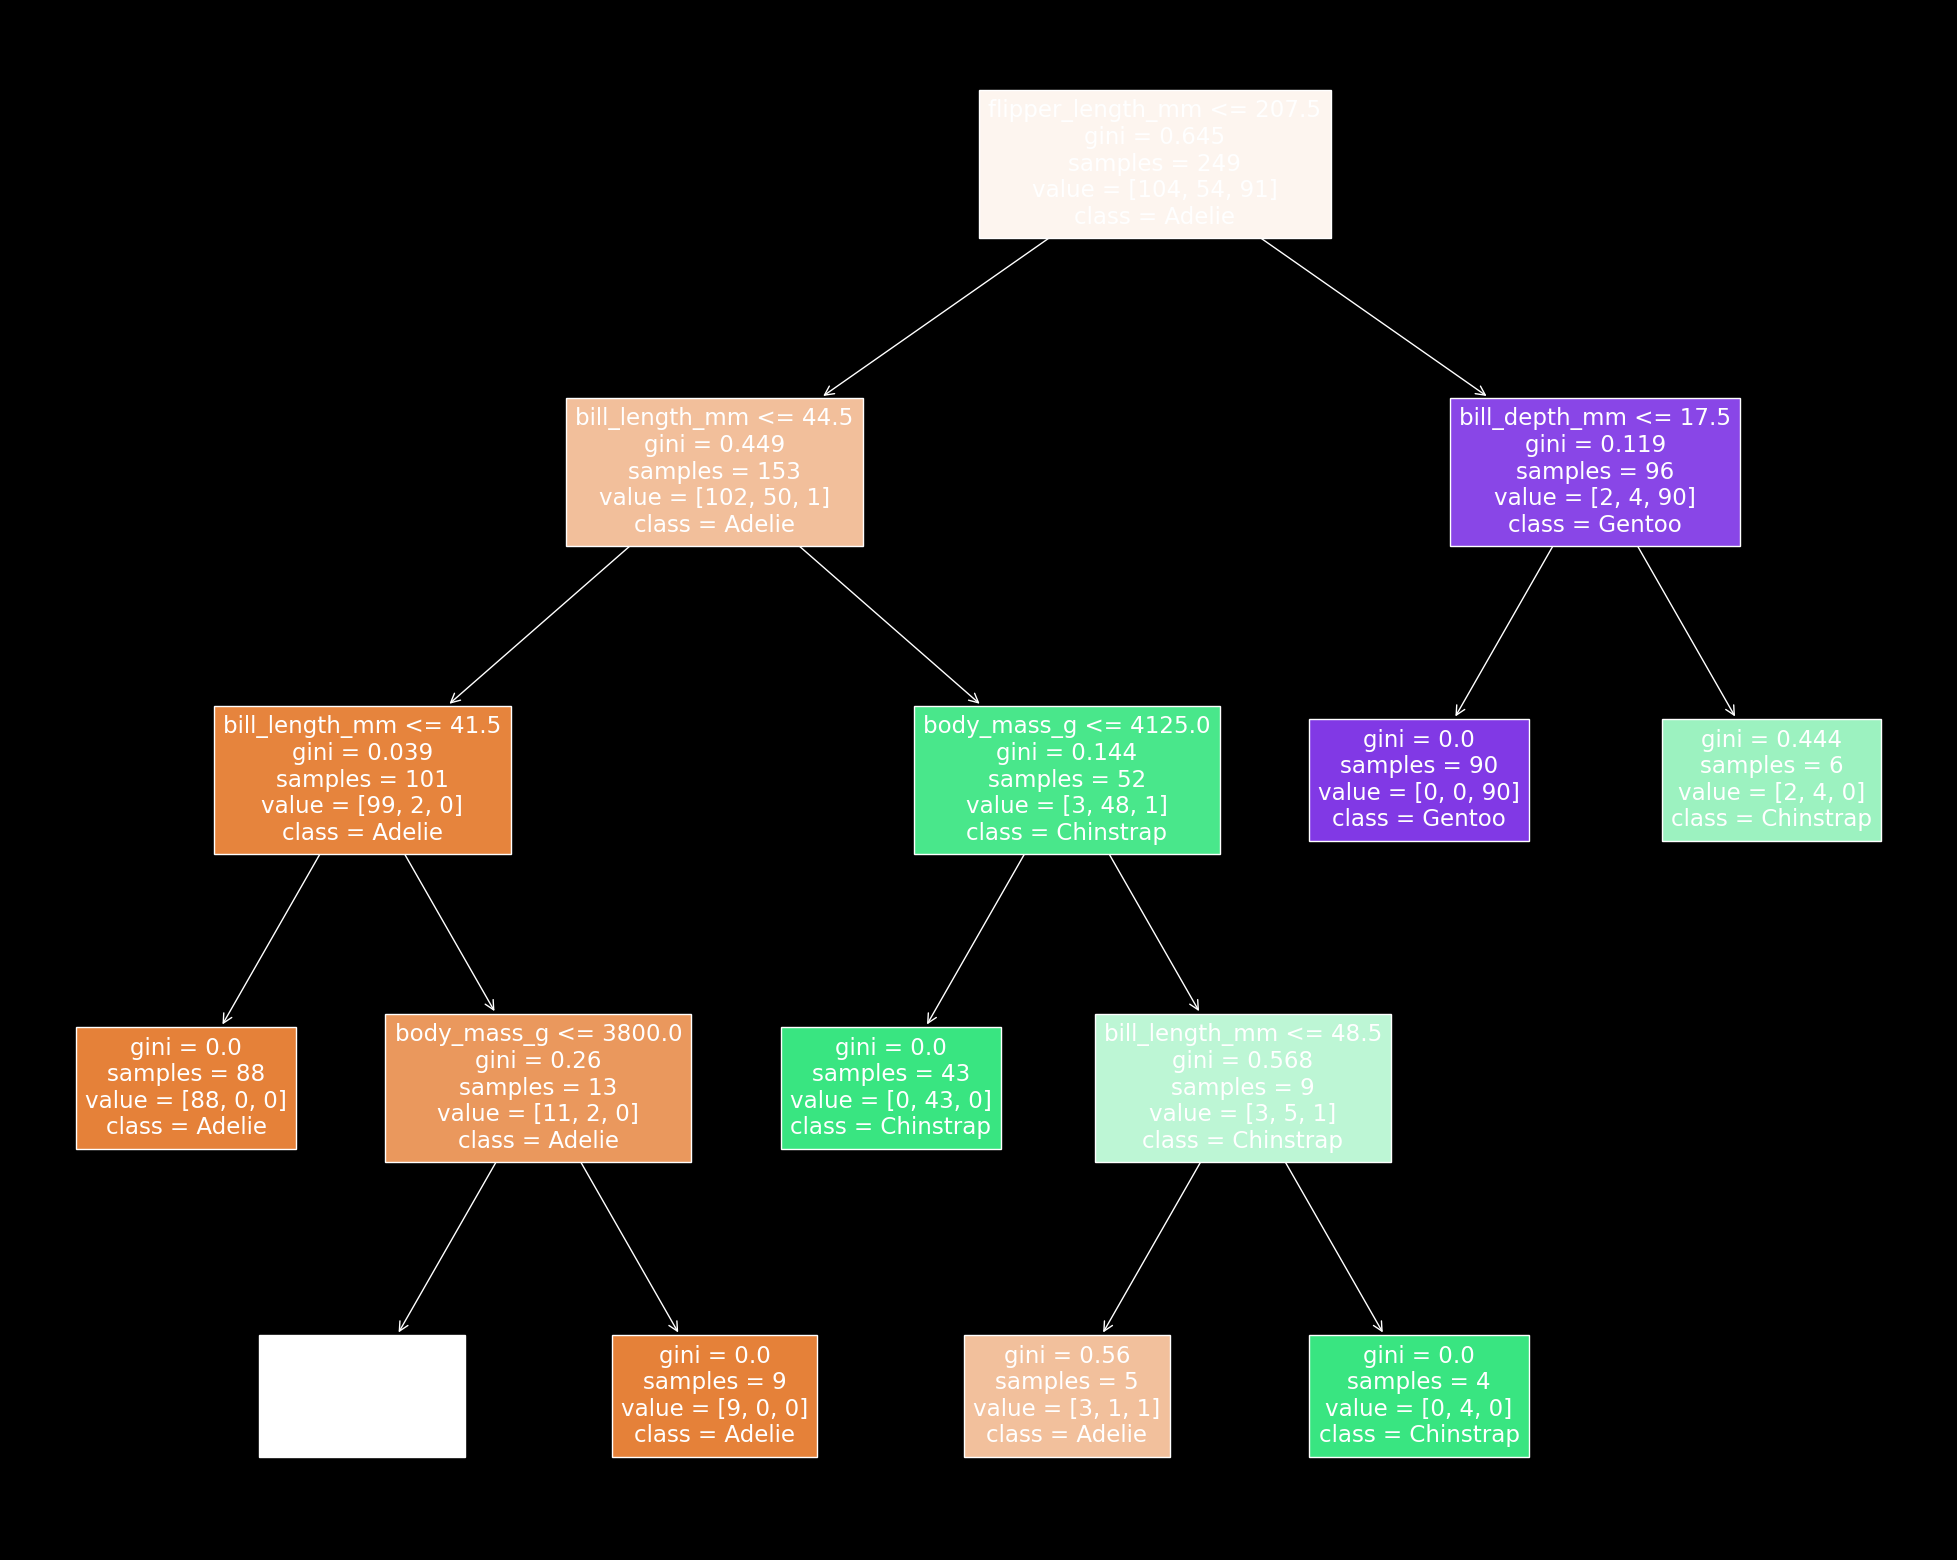

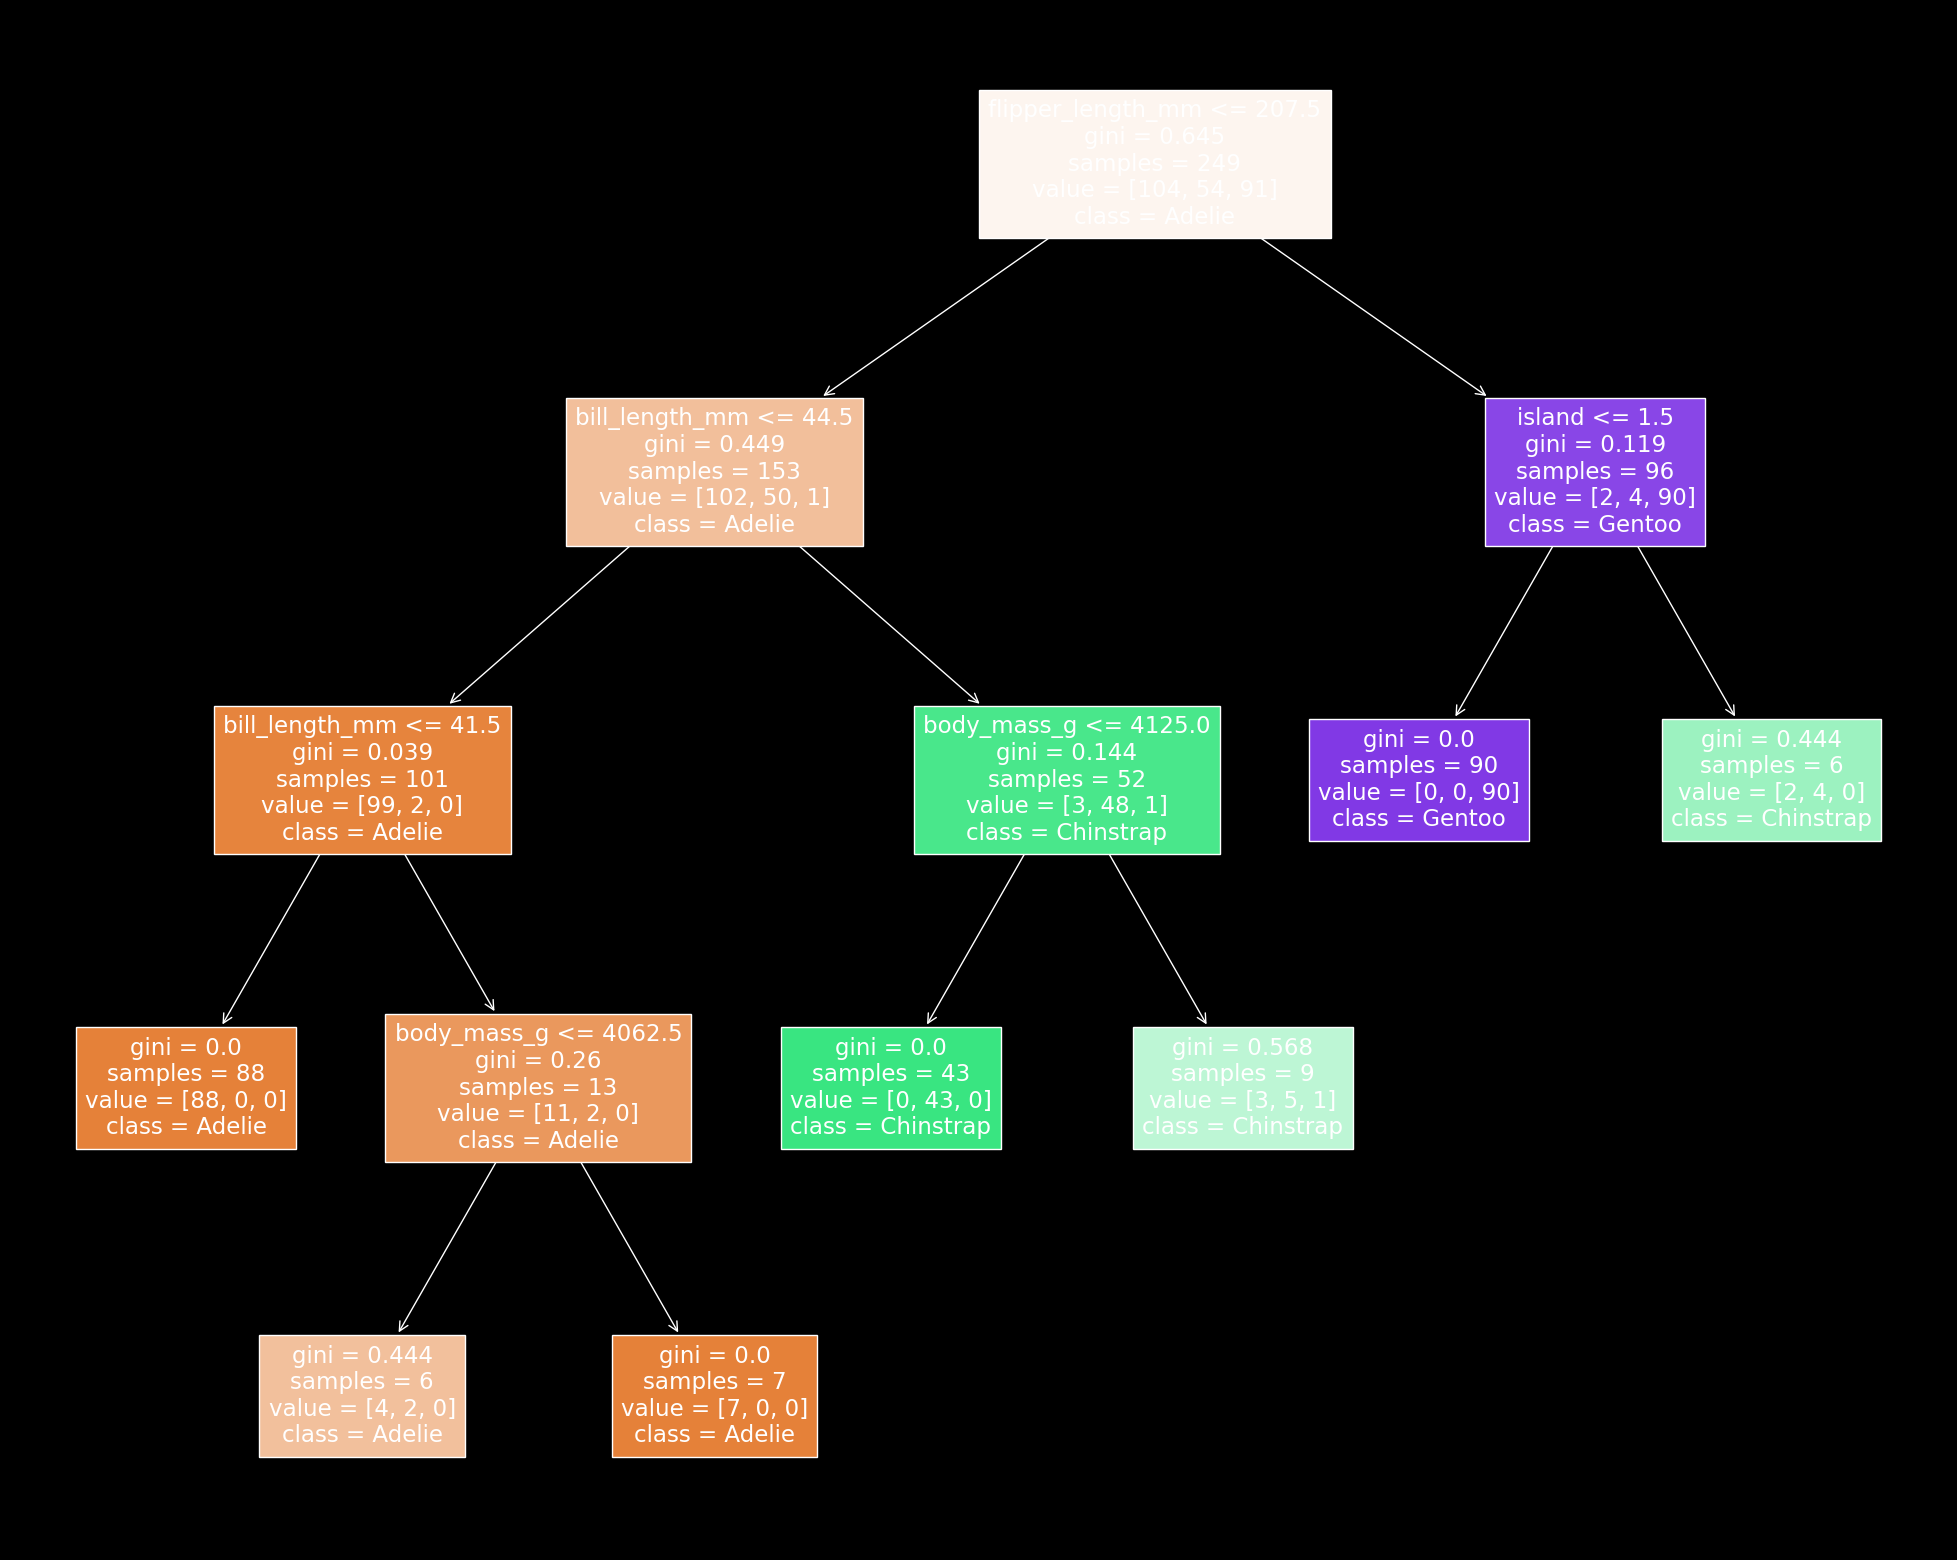

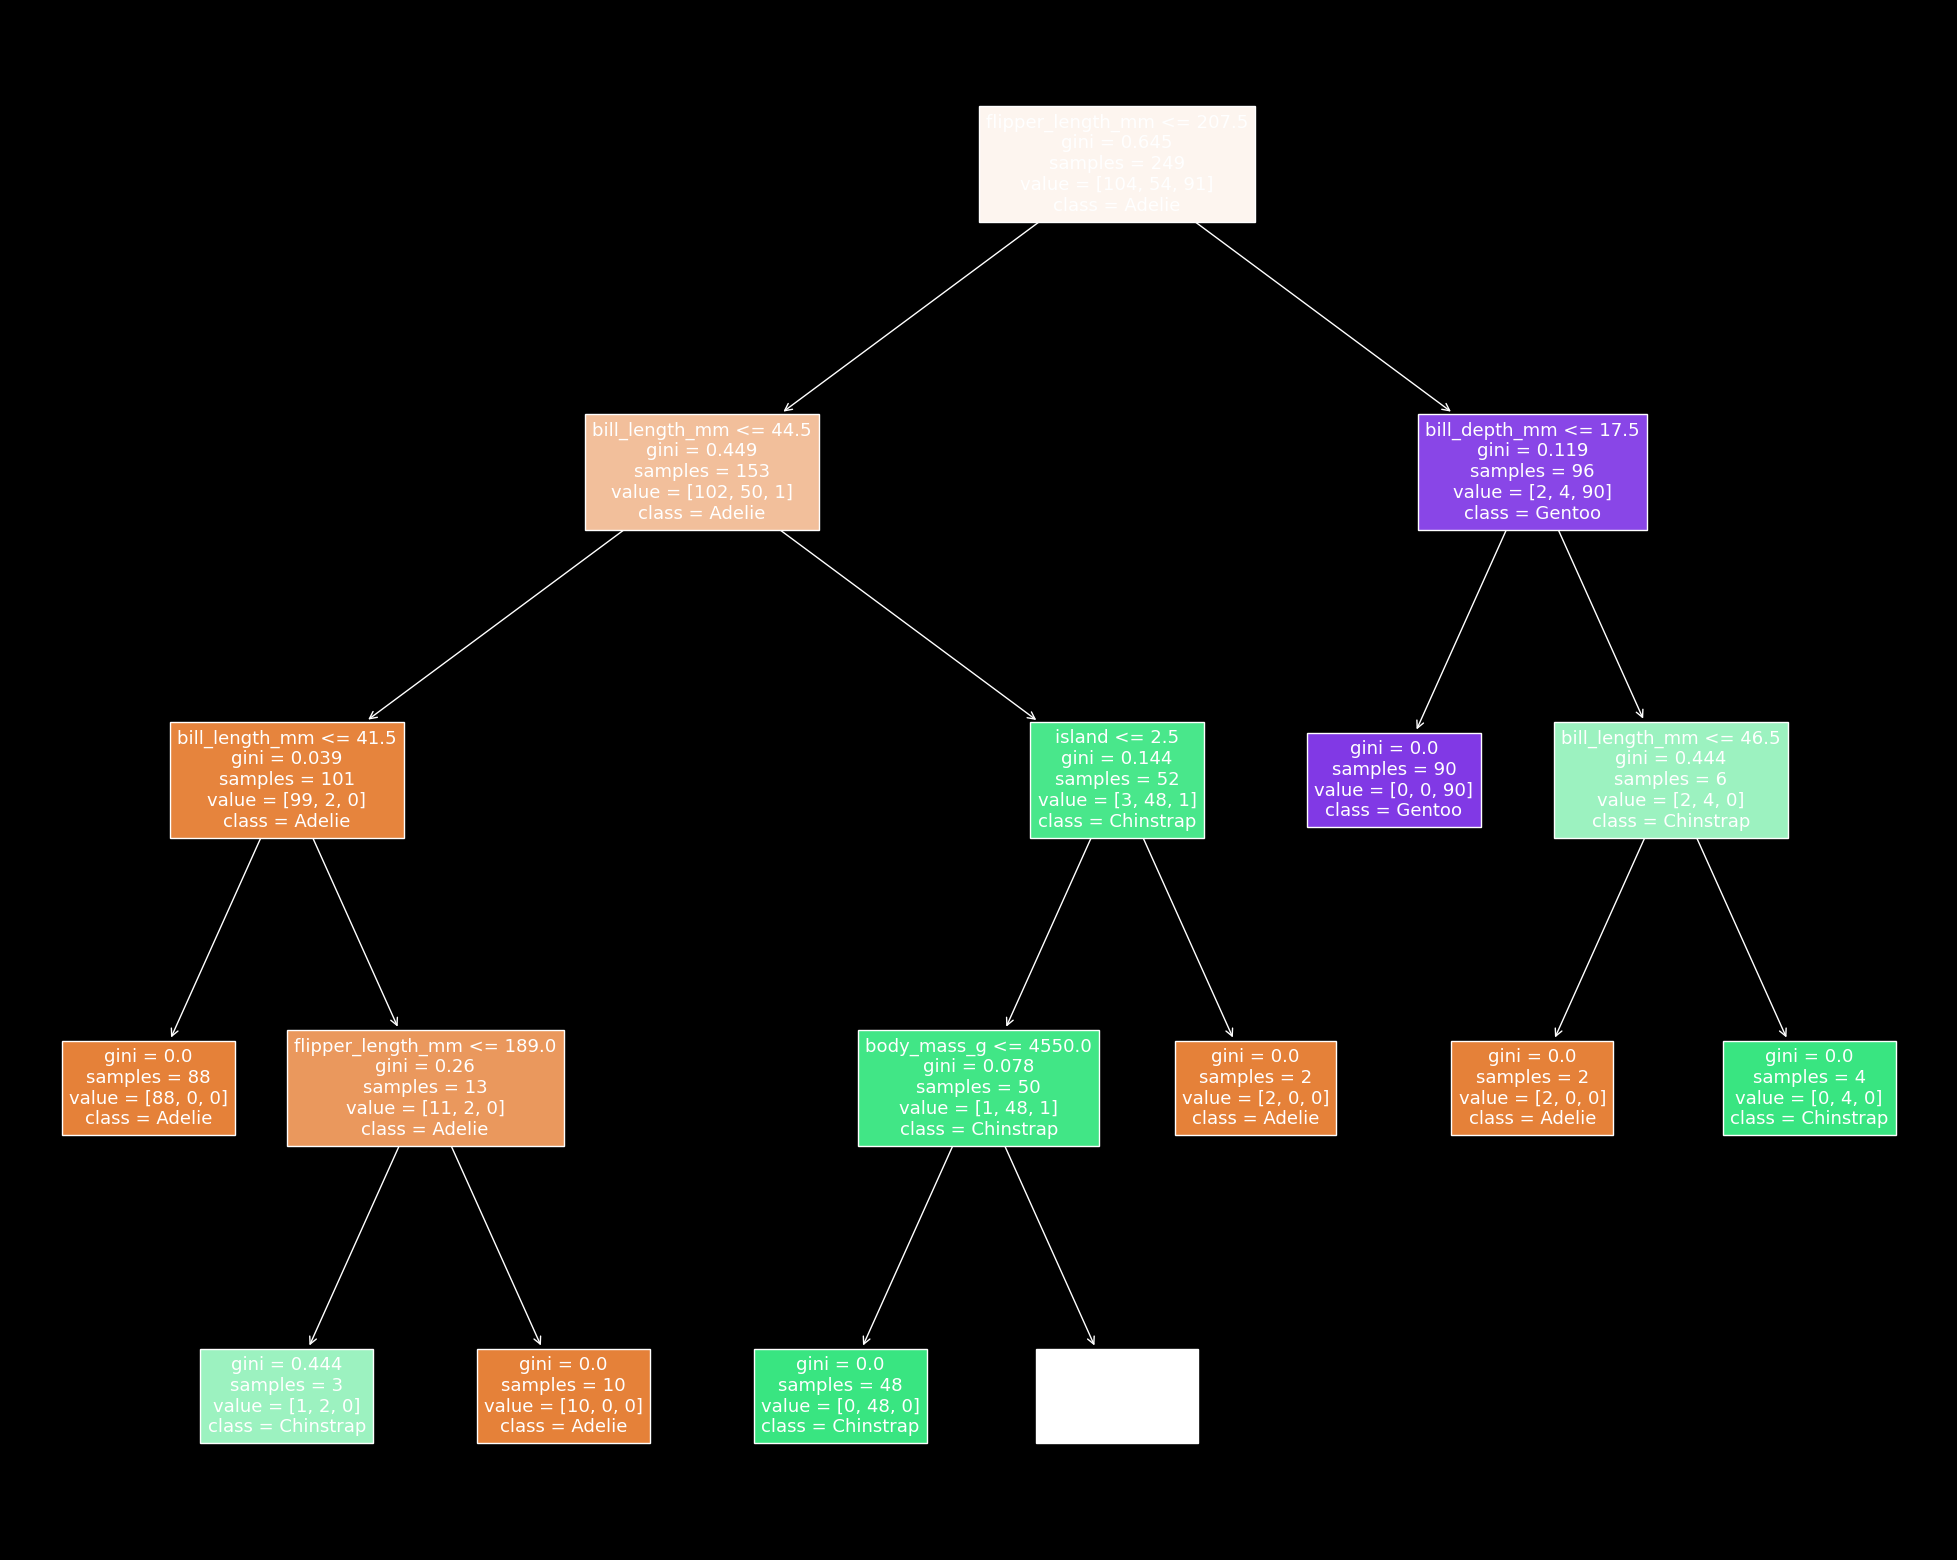

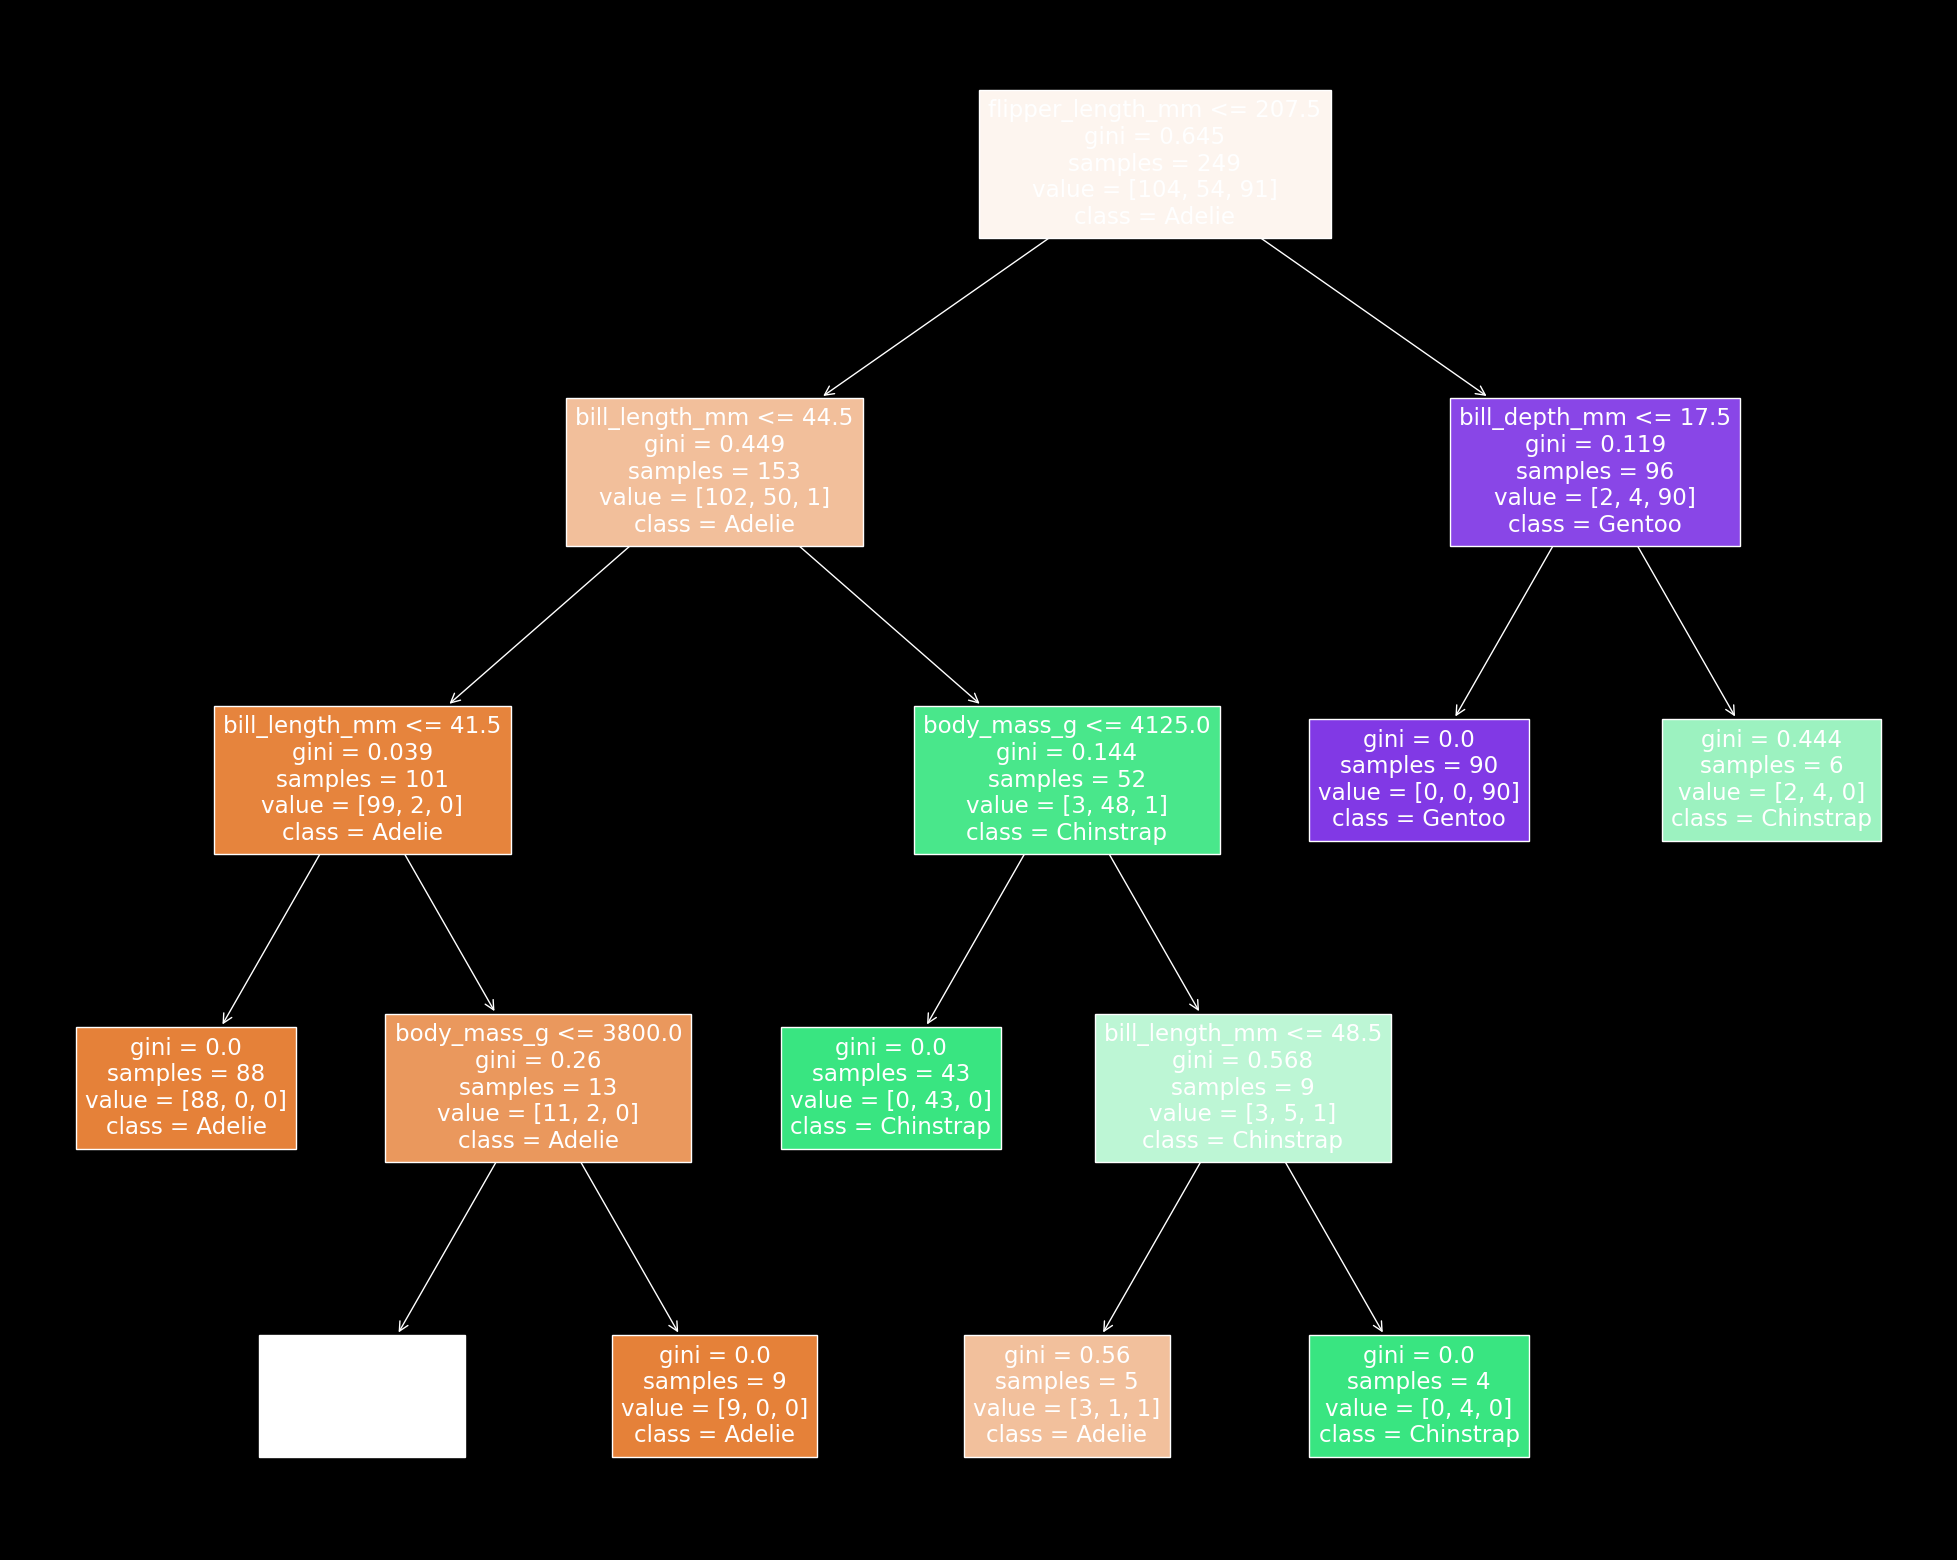

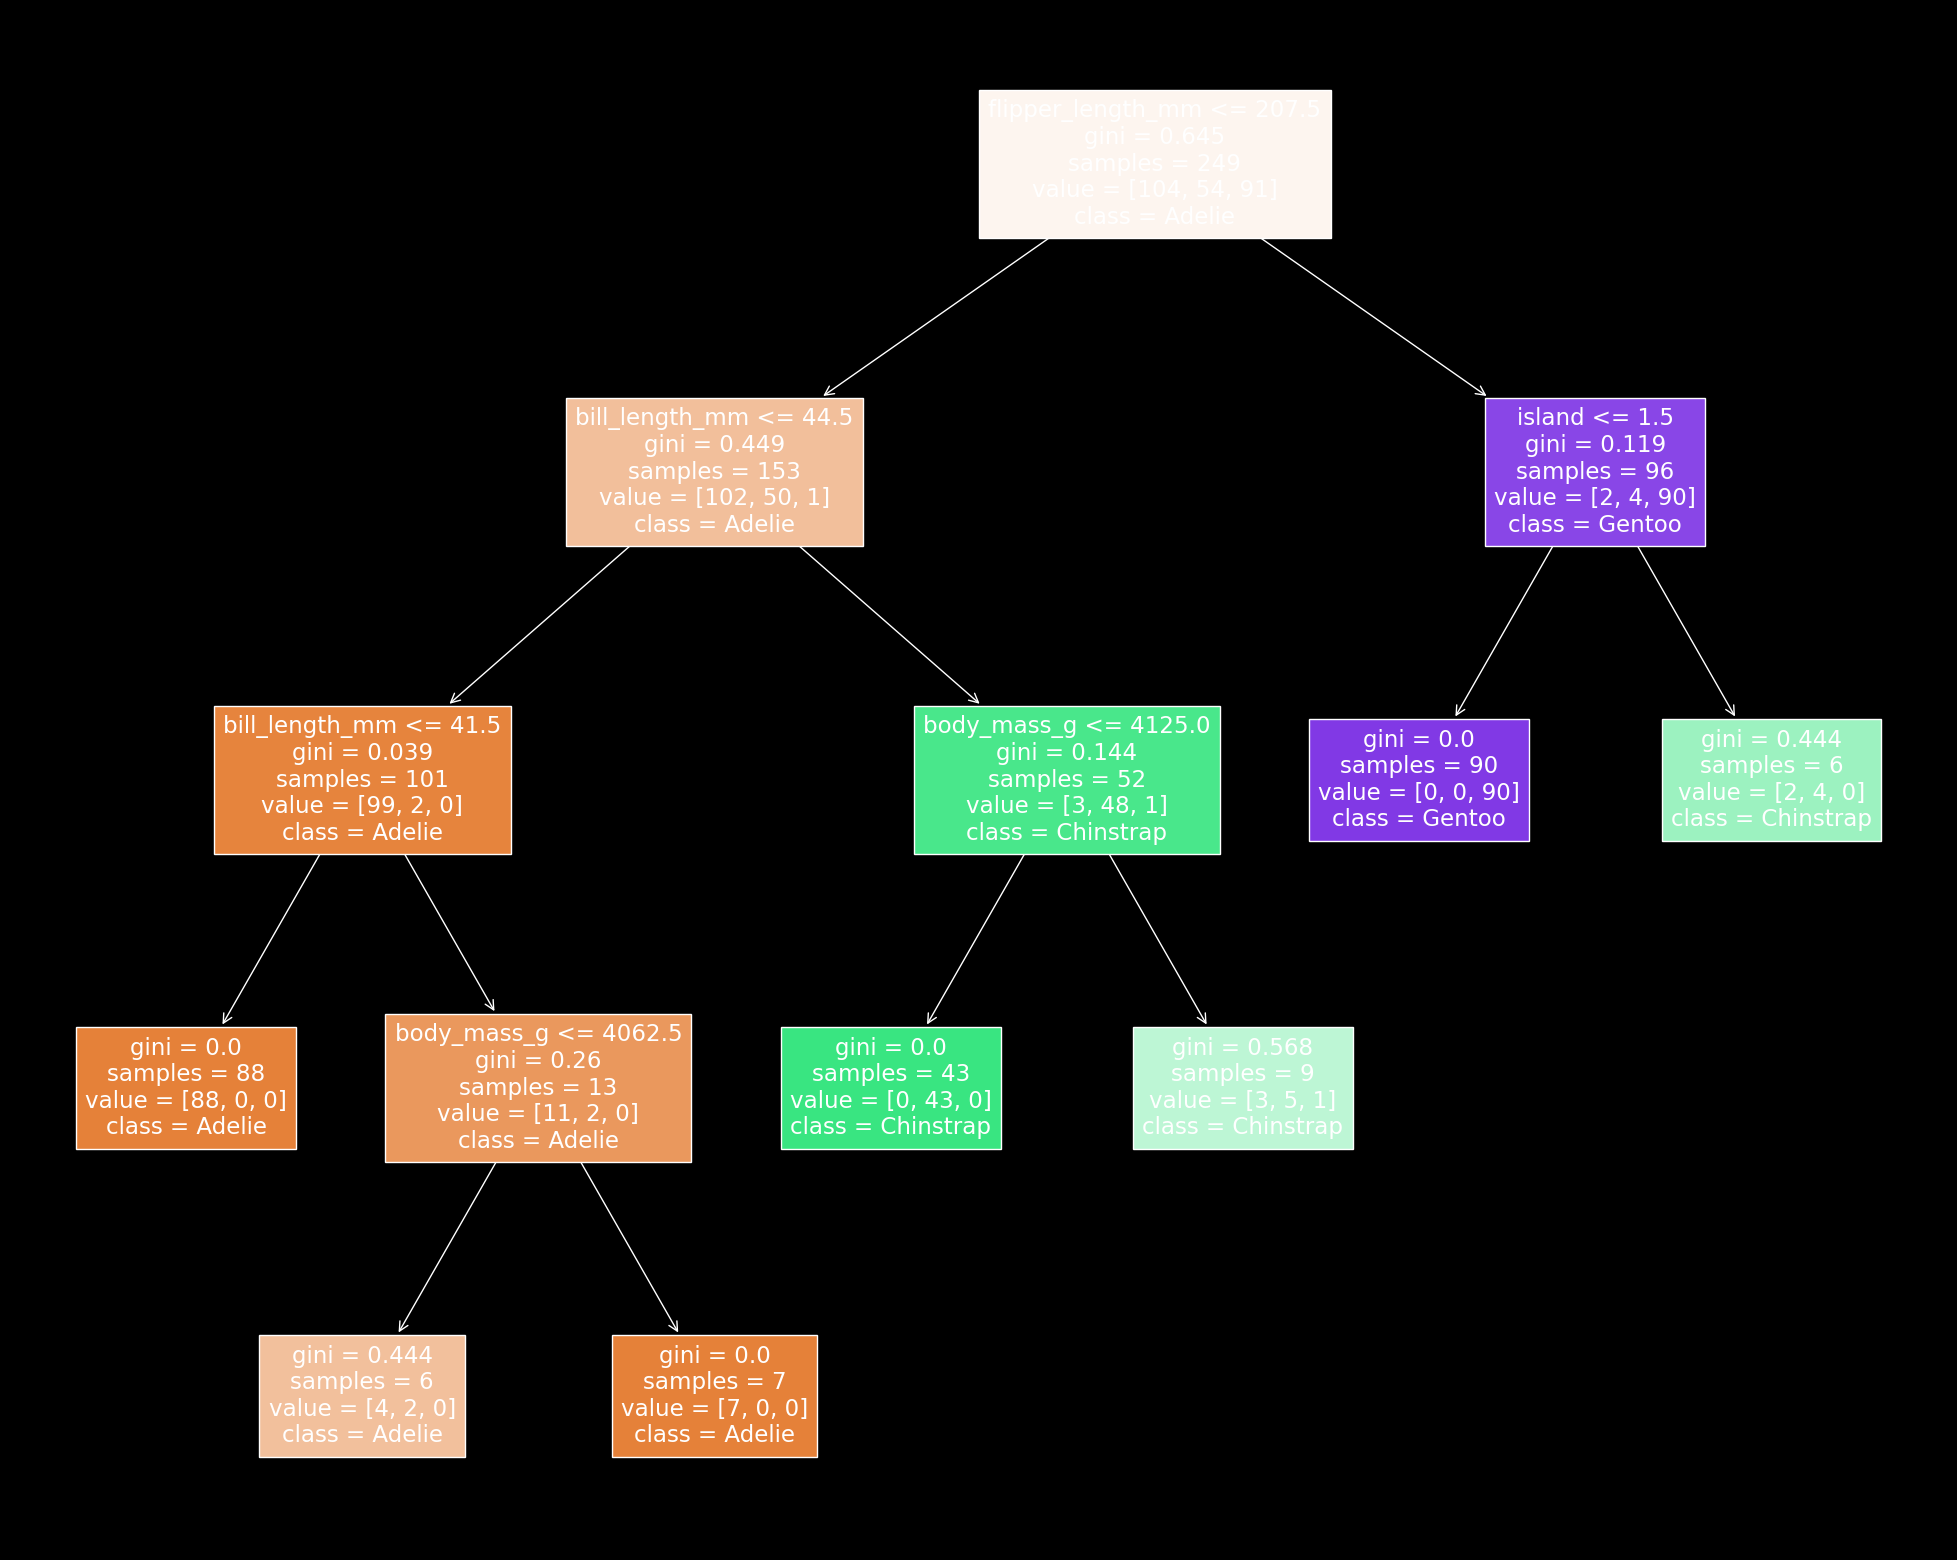

In [81]:
maxdepth = [5,7,10]
leastnode = [2,4,6]
for depth in maxdepth:
    for node in leastnode:
        model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=node)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        plot = plt.figure(figsize=(25,20))
        _ = tree.plot_tree(model, 
                   feature_names=features,
                   class_names=["Adelie","Chinstrap","Gentoo"],
                   filled=True)
        print("when maxdepth = ",depth,", least node size = ",node,",\n the train accuracy is %.2f" % (model.score(X_train,y_train))," and the test accuracy score is %.2f" % accuracy_score(y_pred,y_test),sep='')

# Bagging of trees

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [83]:
depths = [2, 5, 10]
trees = [10, 20, 50]
for depth in depths:
    for tre in trees:
        model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth), n_estimators=tre)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print("when maxdepth = ",depth,", the number of trees = ",tre,", \n the train accuracy is %.2f" % (model.score(X_train,y_train))," and the test accuracy score is %.2f" % accuracy_score(y_pred,y_test),sep='')

when maxdepth = 2, the number of trees = 10, 
 the train accuracy is 0.97 and the test accuracy score is 0.94
when maxdepth = 2, the number of trees = 20, 
 the train accuracy is 0.97 and the test accuracy score is 0.95
when maxdepth = 2, the number of trees = 50, 
 the train accuracy is 0.97 and the test accuracy score is 0.94
when maxdepth = 5, the number of trees = 10, 
 the train accuracy is 1.00 and the test accuracy score is 0.98
when maxdepth = 5, the number of trees = 20, 
 the train accuracy is 1.00 and the test accuracy score is 0.96
when maxdepth = 5, the number of trees = 50, 
 the train accuracy is 1.00 and the test accuracy score is 0.98
when maxdepth = 10, the number of trees = 10, 
 the train accuracy is 1.00 and the test accuracy score is 0.98
when maxdepth = 10, the number of trees = 20, 
 the train accuracy is 1.00 and the test accuracy score is 0.96
when maxdepth = 10, the number of trees = 50, 
 the train accuracy is 1.00 and the test accuracy score is 0.96


# Random forests

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [85]:
splits = [1, 3, 6]
trees = [10, 20, 50]
for split in splits:
    for tre in trees:
        model = RandomForestClassifier(max_features=split, n_estimators=tre)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        print("when the number of trees=",tre,", value of m=",split,", \n the train accuracy is %.2f" % (model.score(X_train,y_train))," and the test accuracy score is %.2f" % accuracy_score(y_pred,y_test),sep='')

when the number of trees=10, value of m=1, 
 the train accuracy is 1.00 and the test accuracy score is 0.96
when the number of trees=20, value of m=1, 
 the train accuracy is 1.00 and the test accuracy score is 0.98
when the number of trees=50, value of m=1, 
 the train accuracy is 1.00 and the test accuracy score is 0.96
when the number of trees=10, value of m=3, 
 the train accuracy is 1.00 and the test accuracy score is 0.96
when the number of trees=20, value of m=3, 
 the train accuracy is 1.00 and the test accuracy score is 0.95
when the number of trees=50, value of m=3, 
 the train accuracy is 1.00 and the test accuracy score is 0.98
when the number of trees=10, value of m=6, 
 the train accuracy is 1.00 and the test accuracy score is 0.96
when the number of trees=20, value of m=6, 
 the train accuracy is 1.00 and the test accuracy score is 0.98
when the number of trees=50, value of m=6, 
 the train accuracy is 1.00 and the test accuracy score is 0.98


# Plot

In [86]:
trees = [x*10 for x in range(1,11)]
from mlxtend.evaluate import bias_variance_decomp


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
bias = []
var = []

In [91]:
for tre in trees:
    model = RandomForestClassifier(n_estimators=tre)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        model, X_train.values, y_train.values, X_test.values, y_test.values, 
        loss="mse")
    bias.append(avg_bias*avg_bias)
    var.append(avg_var)
    print("When the number of trees =",tre)
    print('Average bias^2: %.5f' % (avg_bias*avg_bias))
    print('Average variance: %.3f \n' % avg_var)

When the number of trees = 10
Average bias^2: 0.00073
Average variance: 0.014 

When the number of trees = 20
Average bias^2: 0.00074
Average variance: 0.010 

When the number of trees = 30
Average bias^2: 0.00083
Average variance: 0.008 

When the number of trees = 40
Average bias^2: 0.00074
Average variance: 0.007 

When the number of trees = 50
Average bias^2: 0.00083
Average variance: 0.007 

When the number of trees = 60
Average bias^2: 0.00071
Average variance: 0.007 

When the number of trees = 70
Average bias^2: 0.00074
Average variance: 0.007 

When the number of trees = 80
Average bias^2: 0.00079
Average variance: 0.007 

When the number of trees = 90
Average bias^2: 0.00067
Average variance: 0.007 

When the number of trees = 100
Average bias^2: 0.00072
Average variance: 0.006 



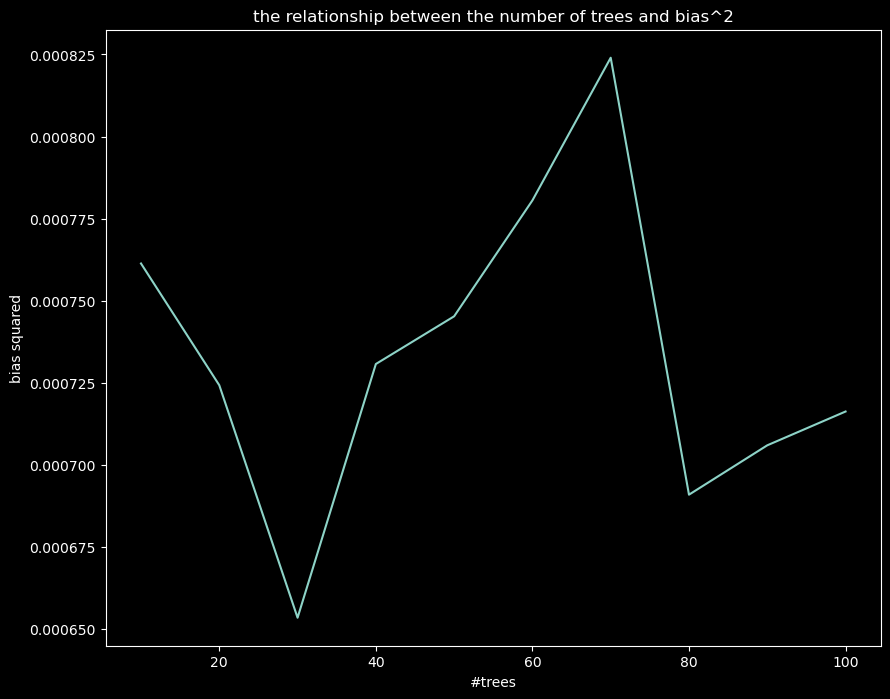

In [89]:
fig = plt.figure(figsize=(10,8))
plt.plot(trees,bias)
plt.xlabel("#trees")
plt.ylabel("bias squared")
plt.title("the relationship between the number of trees and bias^2")
plt.show()

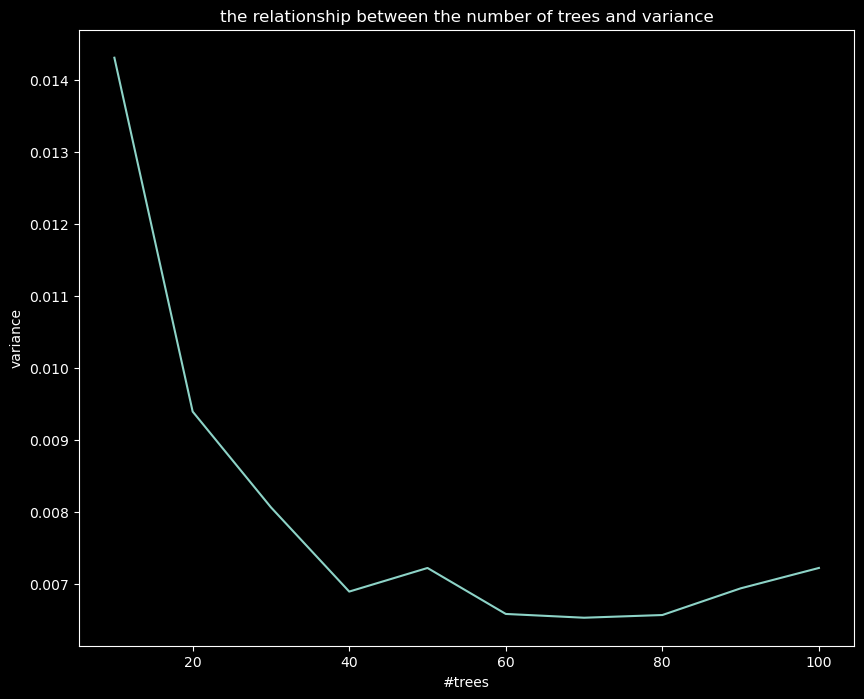

In [90]:
fig = plt.figure(figsize=(10,8))
plt.plot(trees,var)
plt.xlabel("#trees")
plt.ylabel("variance")
plt.title("the relationship between the number of trees and variance")
plt.show()